<a href="https://colab.research.google.com/github/JyothiSupriya/MARITIME-SAFETY-CLASSIFICATION-USING-LLMs/blob/main/Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confusion matrix

LLAMA 3B Confusion Matrix (No/Yes):
 [[3920  858]
 [  12  210]]
LLAMA 3B Accuracy: 0.8260

GEMMA 7B Confusion Matrix (No/Yes):
 [[4364  414]
 [  21  201]]
GEMMA 7B Accuracy: 0.9130

MISTRAL 7B Confusion Matrix (No/Yes):
 [[4308  470]
 [  19  203]]
MISTRAL 7B Accuracy: 0.9022

DEEP 14B Confusion Matrix (No/Yes):
 [[4312  466]
 [  24  198]]
DEEP 14B Accuracy: 0.9020

QWEN 32B Confusion Matrix (No/Yes):
 [[4135  643]
 [  16  206]]
QWEN 32B Accuracy: 0.8682

PHI 14B Confusion Matrix (No/Yes):
 [[4543  235]
 [  30  192]]
PHI 14B Accuracy: 0.9470

GEMMA 27B Confusion Matrix (No/Yes):
 [[4380  398]
 [  16  206]]
GEMMA 27B Accuracy: 0.9172

LLAMA 70B Confusion Matrix (No/Yes):
 [[4569  209]
 [  16  206]]
LLAMA 70B Accuracy: 0.9550

DEEP 32B Confusion Matrix (No/Yes):
 [[4349  429]
 [  23  199]]
DEEP 32B Accuracy: 0.9096

Top two models by accuracy: ['Llama 70b', 'Phi 14b']
Voting Agreement Rate (top two models): 0.9608


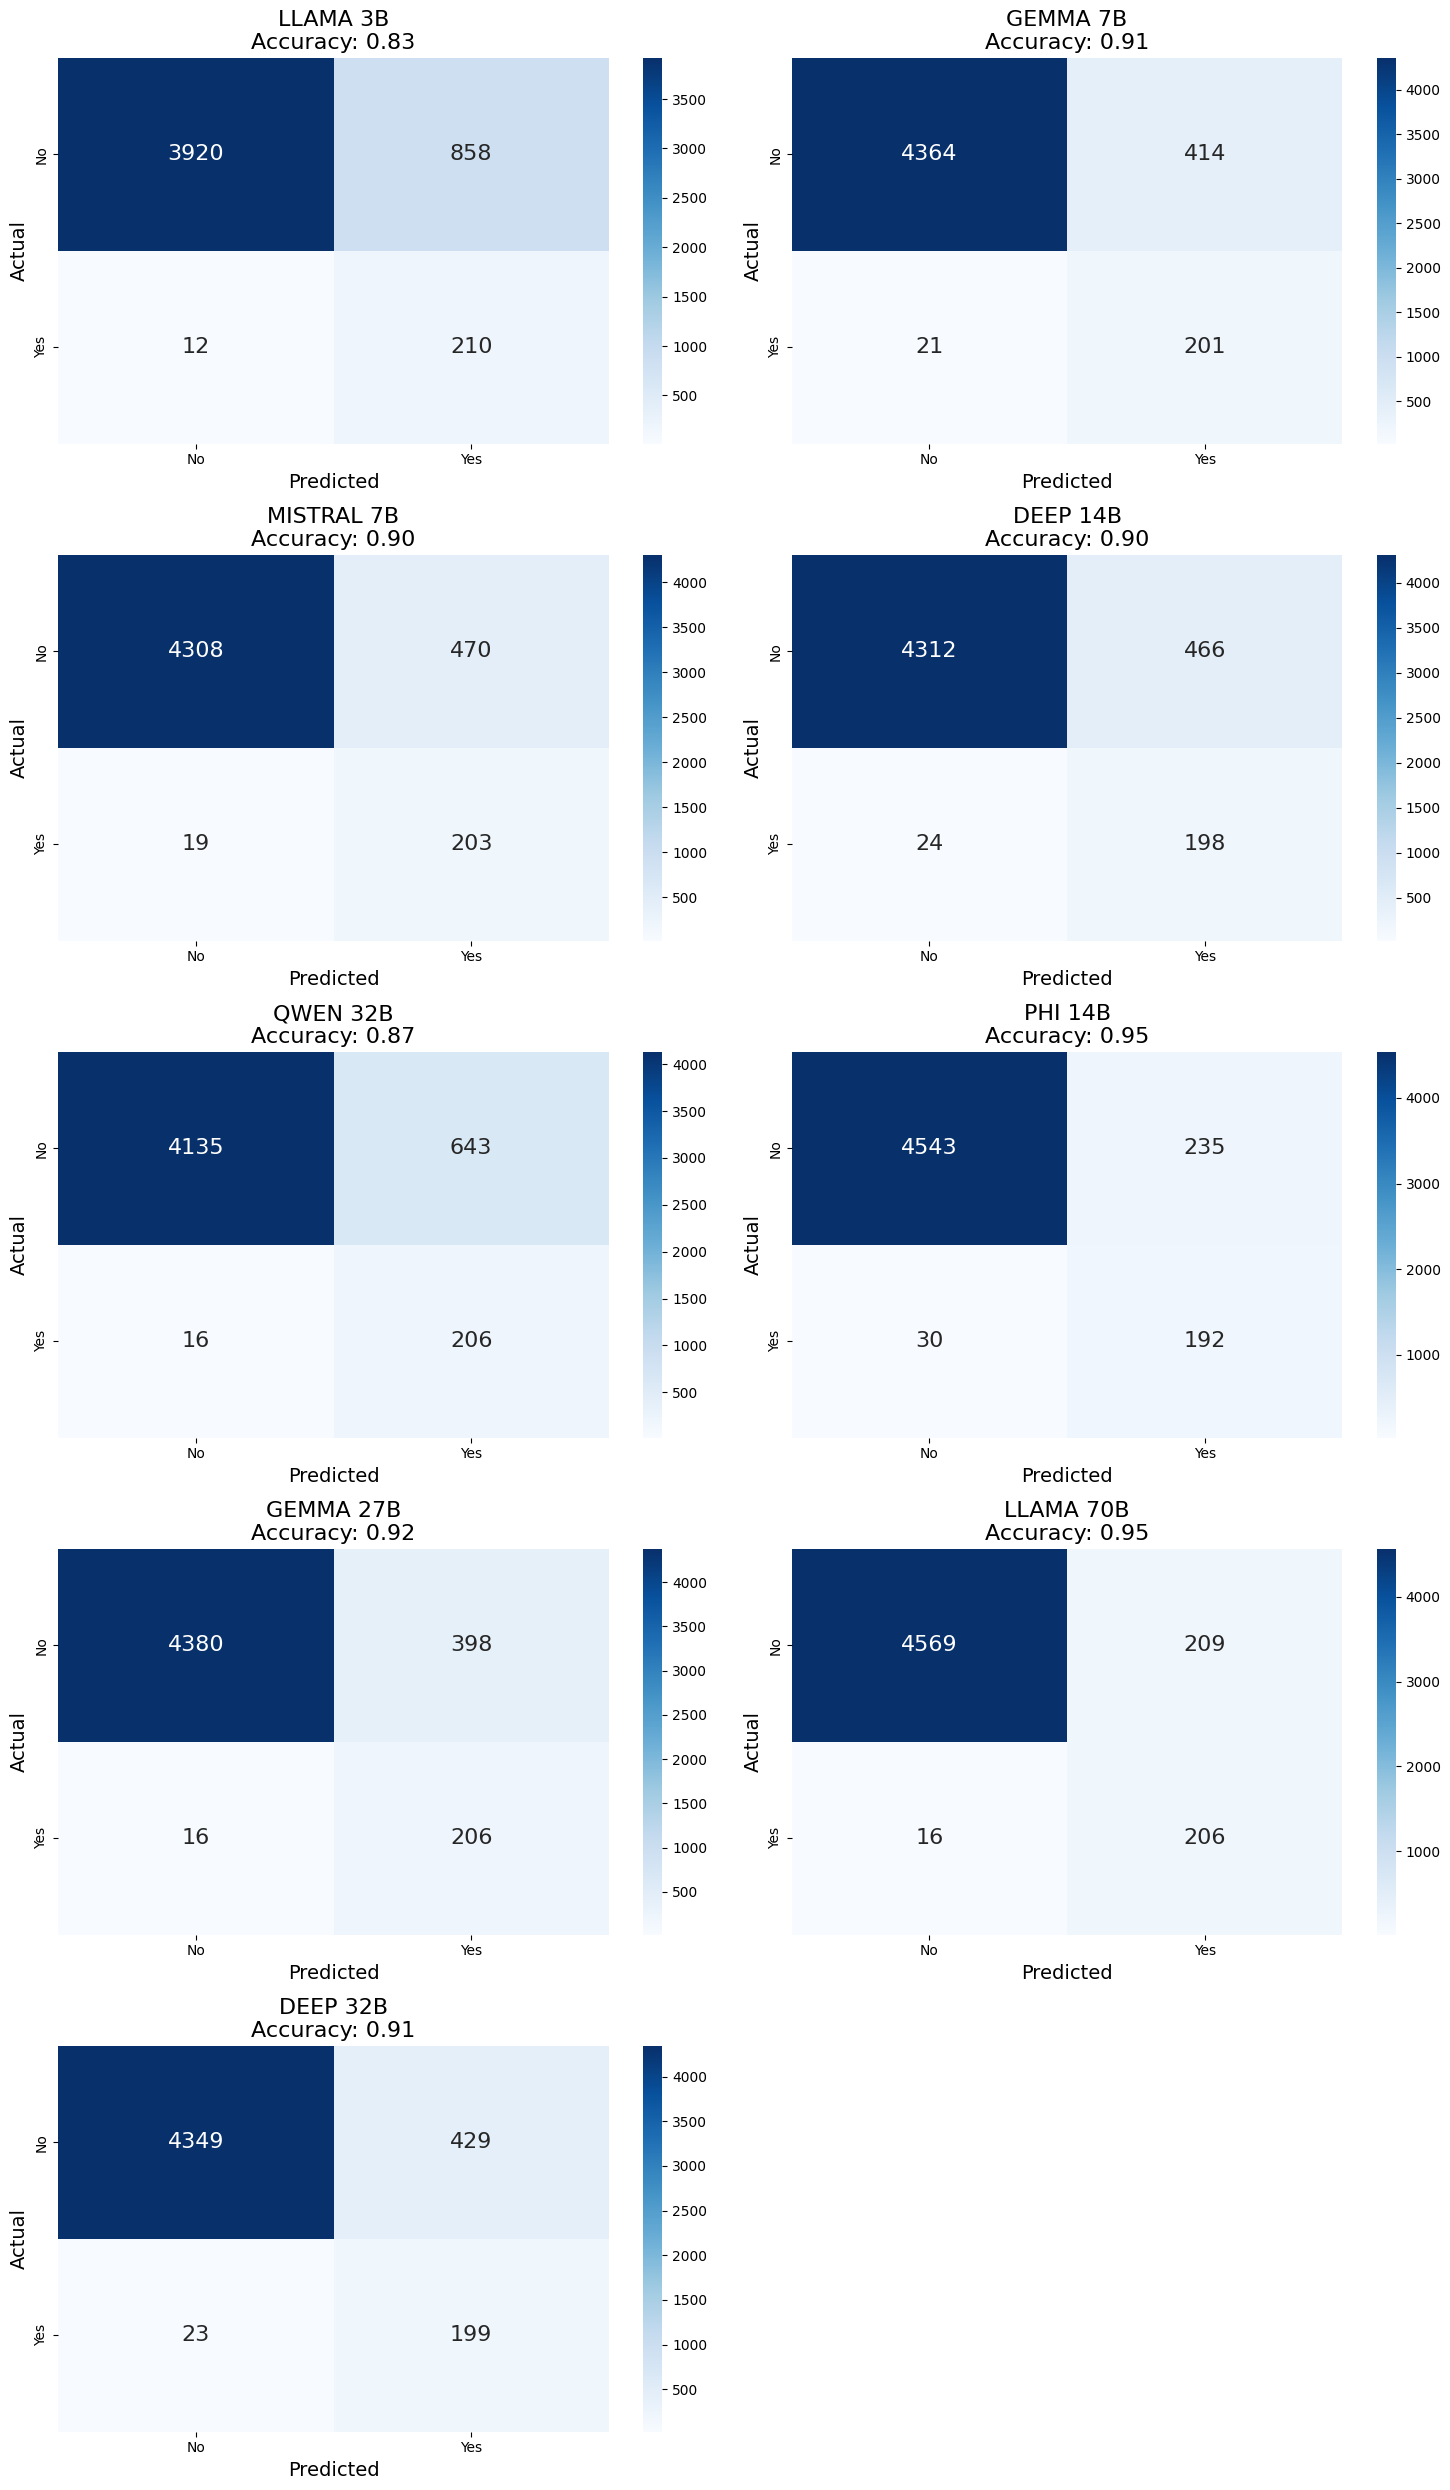

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import math

# ===== STEP 1: LOAD THE DATA =====
file_path = '/content/Final_results_LLM.xlsx'
df = pd.read_excel(file_path)

# ===== STEP 2: COMPUTE CONFUSION MATRICES AND ACCURACIES =====
# We'll specify labels=["No", "Yes"] to ensure consistent 2x2 ordering in confusion matrices.
def get_conf_matrix_and_acc(true_col, pred_col, model_name):
    cm = confusion_matrix(df[true_col], df[pred_col], labels=["No", "Yes"])
    acc = accuracy_score(df[true_col], df[pred_col])
    print(f"{model_name} Confusion Matrix (No/Yes):\n", cm)
    print(f"{model_name} Accuracy: {acc:.4f}\n")
    return cm, acc

cm_llama, acc_llama         = get_conf_matrix_and_acc('Human Response', 'LLM Response_Llama 3b', 'LLAMA 3B')
cm_gemma7b, acc_gemma7b     = get_conf_matrix_and_acc('Human Response', 'LLM Response_Gemma 7b', 'GEMMA 7B')
cm_mistral, acc_mistral     = get_conf_matrix_and_acc('Human Response', 'LLM Response_Mistral 7b', 'MISTRAL 7B')
cm_deep14b, acc_deep14b     = get_conf_matrix_and_acc('Human Response', 'LLM Response_Deep 14b', 'DEEP 14B')
cm_qwen32b, acc_qwen32b     = get_conf_matrix_and_acc('Human Response', 'LLM Response_Qwen 32b', 'QWEN 32B')
cm_phi14b, acc_phi14b       = get_conf_matrix_and_acc('Human Response', 'LLM Response_Phi 14b', 'PHI 14B')
cm_gemma27b, acc_gemma27b   = get_conf_matrix_and_acc('Human Response', 'LLM Response_Gemma 27b', 'GEMMA 27B')
cm_llama70, acc_llama70     = get_conf_matrix_and_acc('Human Response', 'LLM Response_Llama 70b', 'LLAMA 70B')
cm_deep32b, acc_deep32b     = get_conf_matrix_and_acc('Human Response', 'LLM Response_Deep 32b', 'DEEP 32B')

# ===== STEP 3: DETERMINE THE TOP TWO MODELS BY ACCURACY =====
model_accuracies = {
    'Llama 3b': acc_llama,
    'Gemma 7b': acc_gemma7b,
    'Mistral 7b': acc_mistral,
    'Deep 14b': acc_deep14b,
    'Qwen 32b': acc_qwen32b,
    'Phi 14b': acc_phi14b,
    'Gemma 27b': acc_gemma27b,
    'Llama 70b': acc_llama70,
    'Deep 32b': acc_deep32b
}
top_models = sorted(model_accuracies, key=model_accuracies.get, reverse=True)[:2]
print("Top two models by accuracy:", top_models)

# ===== STEP 4: MAJORITY-VOTING AGREEMENT BETWEEN TOP TWO =====
# We'll say '1' if they agree, '0' otherwise
model1, model2 = top_models
df['Voting_Result'] = (
    df[f'LLM Response_{model1}'] == df[f'LLM Response_{model2}']
).astype(int)

agreement_rate = df['Voting_Result'].mean()
print("Voting Agreement Rate (top two models):", agreement_rate)


# Define the 'models' variable here
models = [
    ('LLAMA 3B', cm_llama, acc_llama),
    ('GEMMA 7B', cm_gemma7b, acc_gemma7b),
    ('MISTRAL 7B', cm_mistral, acc_mistral),
    ('DEEP 14B', cm_deep14b, acc_deep14b),
    ('QWEN 32B', cm_qwen32b, acc_qwen32b),
    ('PHI 14B', cm_phi14b, acc_phi14b),
    ('GEMMA 27B', cm_gemma27b, acc_gemma27b),
    ('LLAMA 70B', cm_llama70, acc_llama70),
    ('DEEP 32B', cm_deep32b, acc_deep32b)
]

n_models = len(models)
ncols = 2
nrows = math.ceil(n_models / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, (model_name, cm, acc) in enumerate(models):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=["No", "Yes"], yticklabels=["No", "Yes"],
                annot_kws={"size": 16})
    axes[i].set_title(f'{model_name}\nAccuracy: {acc:.2f}', fontsize=16)
    axes[i].set_xlabel('Predicted', fontsize=14)
    axes[i].set_ylabel('Actual', fontsize=14)

# Hide any unused subplots if the total number of models is odd
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##**F1 Scores**

==== LLAMA 3B Classification Report ====
              precision    recall  f1-score   support

          No       1.00      0.82      0.90      4778
         Yes       0.20      0.95      0.33       222

    accuracy                           0.83      5000
   macro avg       0.60      0.88      0.61      5000
weighted avg       0.96      0.83      0.87      5000

==== GEMMA 7B Classification Report ====
              precision    recall  f1-score   support

          No       1.00      0.91      0.95      4778
         Yes       0.33      0.91      0.48       222

    accuracy                           0.91      5000
   macro avg       0.66      0.91      0.72      5000
weighted avg       0.97      0.91      0.93      5000

==== MISTRAL 7B Classification Report ====
              precision    recall  f1-score   support

          No       1.00      0.90      0.95      4778
         Yes       0.30      0.91      0.45       222

    accuracy                           0.90      5000
   

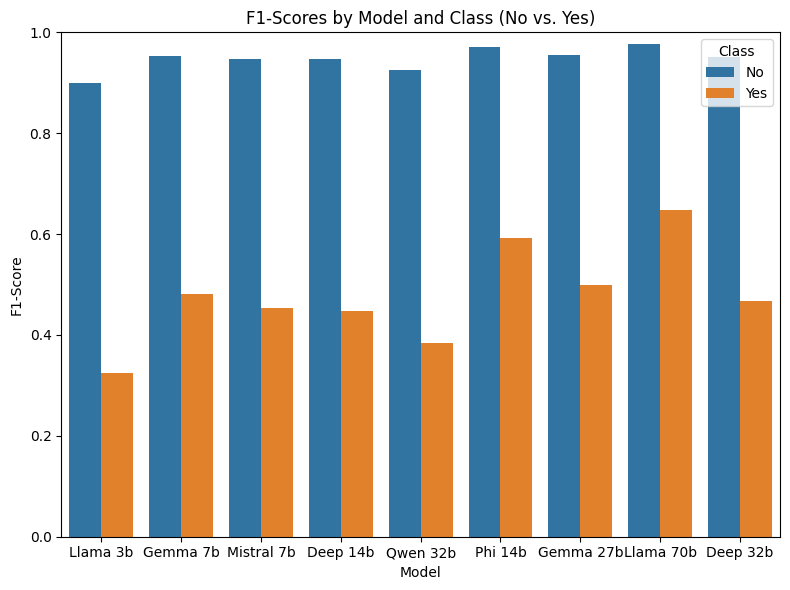

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# List of model names matching your columns (updated to include Llama 70b)
models = ['Llama 3b', 'Gemma 7b', 'Mistral 7b', 'Deep 14b', 'Qwen 32b', 'Phi 14b', 'Gemma 27b', 'Llama 70b', 'Deep 32b']

# ===== STEP 1: LOAD THE DATA =====
file_path = '/content/Final_results_LLM.xlsx'
df = pd.read_excel(file_path)

# 1) Print Precision, Recall, F1 for each model (2-class: "No" / "Yes")
for model in models:
    y_true = df['Human Response']
    y_pred = df[f'LLM Response_{model}']
    print(f"==== {model.upper()} Classification Report ====")
    # We specify labels=["No","Yes"] to keep the 2-class order consistent
    print(classification_report(y_true, y_pred, labels=["No","Yes"], zero_division=0))

# 2) Create a bar plot of F1-scores for both classes (No & Yes) across models
all_reports = []

# Generate classification_report as a dictionary, then convert to DataFrame
for model in models:
    y_true = df['Human Response']
    y_pred = df[f'LLM Response_{model}']
    report_dict = classification_report(
        y_true, y_pred, labels=["No","Yes"], output_dict=True, zero_division=0
    )
    # Convert dict to a DataFrame, reset index so we have columns like 'precision','recall','f1-score','support'
    temp_df = pd.DataFrame(report_dict).transpose().reset_index()
    temp_df['model'] = model
    all_reports.append(temp_df)

# Combine all into one DataFrame
report_df = pd.concat(all_reports, ignore_index=True)

# We only care about rows corresponding to the actual classes: "No" or "Yes"
report_df = report_df[report_df['index'].isin(['No','Yes'])]

# Plot the F1-scores in a bar chart, model on x-axis, separate hue for "No" vs. "Yes"
plt.figure(figsize=(8,6))
sns.barplot(data=report_df, x='model', y='f1-score', hue='index')
plt.title('F1-Scores by Model and Class (No vs. Yes)')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


##**Cohen Kappa**

Cohen’s Kappa — Llama 3b:    0.272
Cohen’s Kappa — Gemma 7b:    0.444
Cohen’s Kappa — Mistral 7b:  0.415
Cohen’s Kappa — Deep 14b:    0.408
Cohen’s Kappa — Qwen 32b:    0.338
Cohen’s Kappa — Phi 14b:     0.566
Cohen’s Kappa — Gemma 27b:   0.464
Cohen’s Kappa — Llama 70b:   0.625
Cohen’s Kappa — Deep 32b:    0.431


<ipython-input-5-c53c37152073>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='Set2')


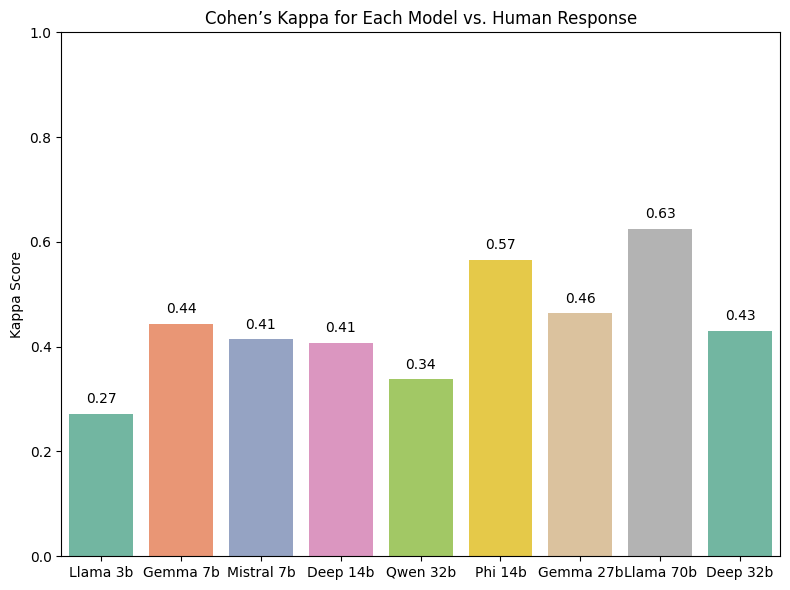

In [ ]:
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Cohen's Kappa for each model vs. Human Response
kappa_llama    = cohen_kappa_score(df['Human Response'], df['LLM Response_Llama 3b'])
kappa_gemma7b  = cohen_kappa_score(df['Human Response'], df['LLM Response_Gemma 7b'])
kappa_mistral  = cohen_kappa_score(df['Human Response'], df['LLM Response_Mistral 7b'])
kappa_deep14b  = cohen_kappa_score(df['Human Response'], df['LLM Response_Deep 14b'])
kappa_qwen32b  = cohen_kappa_score(df['Human Response'], df['LLM Response_Qwen 32b'])
kappa_phi14b   = cohen_kappa_score(df['Human Response'], df['LLM Response_Phi 14b'])
kappa_gemma27b = cohen_kappa_score(df['Human Response'], df['LLM Response_Gemma 27b'])
kappa_llama70  = cohen_kappa_score(df['Human Response'], df['LLM Response_Llama 70b'])
kappa_deep32b  = cohen_kappa_score(df['Human Response'], df['LLM Response_Deep 32b'])

# Print Cohen's Kappa scores
print(f"Cohen’s Kappa — Llama 3b:    {kappa_llama:.3f}")
print(f"Cohen’s Kappa — Gemma 7b:    {kappa_gemma7b:.3f}")
print(f"Cohen’s Kappa — Mistral 7b:  {kappa_mistral:.3f}")
print(f"Cohen’s Kappa — Deep 14b:    {kappa_deep14b:.3f}")
print(f"Cohen’s Kappa — Qwen 32b:    {kappa_qwen32b:.3f}")
print(f"Cohen’s Kappa — Phi 14b:     {kappa_phi14b:.3f}")
print(f"Cohen’s Kappa — Gemma 27b:   {kappa_gemma27b:.3f}")
print(f"Cohen’s Kappa — Llama 70b:   {kappa_llama70:.3f}")
print(f"Cohen’s Kappa — Deep 32b:    {kappa_deep32b:.3f}")

# Visualize in a bar chart
kappa_values = {
    'Llama 3b': kappa_llama,
    'Gemma 7b': kappa_gemma7b,
    'Mistral 7b': kappa_mistral,
    'Deep 14b': kappa_deep14b,
    'Qwen 32b': kappa_qwen32b,
    'Phi 14b': kappa_phi14b,
    'Gemma 27b': kappa_gemma27b,
    'Llama 70b': kappa_llama70,
    'Deep 32b': kappa_deep32b
}

models = list(kappa_values.keys())
scores = list(kappa_values.values())

plt.figure(figsize=(8,6))
sns.barplot(x=models, y=scores, palette='Set2')
plt.title("Cohen’s Kappa for Each Model vs. Human Response")
plt.ylim(0, 1)
plt.ylabel("Kappa Score")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()


##**McNemar’s Test**

=== McNemar’s Test: LLAMA 3B vs GEMMA 7B ===
b (model_i wrong, model_j right): 547
c (model_i right, model_j wrong): 112
Statistic: 112.0, p-value: 1.2350077843417798e-69
=> Significant difference at the 5% level.


=== McNemar’s Test: LLAMA 3B vs MISTRAL 7B ===
b (model_i wrong, model_j right): 481
c (model_i right, model_j wrong): 100
Statistic: 100.0, p-value: 1.0455211397901015e-60
=> Significant difference at the 5% level.


=== McNemar’s Test: LLAMA 3B vs DEEP 14B ===
b (model_i wrong, model_j right): 618
c (model_i right, model_j wrong): 238
Statistic: 238.0, p-value: 1.1316041003752402e-39
=> Significant difference at the 5% level.


=== McNemar’s Test: LLAMA 3B vs QWEN 32B ===
b (model_i wrong, model_j right): 579
c (model_i right, model_j wrong): 368
Statistic: 368.0, p-value: 7.285290893814961e-12
=> Significant difference at the 5% level.


=== McNemar’s Test: LLAMA 3B vs PHI 14B ===
b (model_i wrong, model_j right): 663
c (model_i right, model_j wrong): 58
Statistic: 58.0,

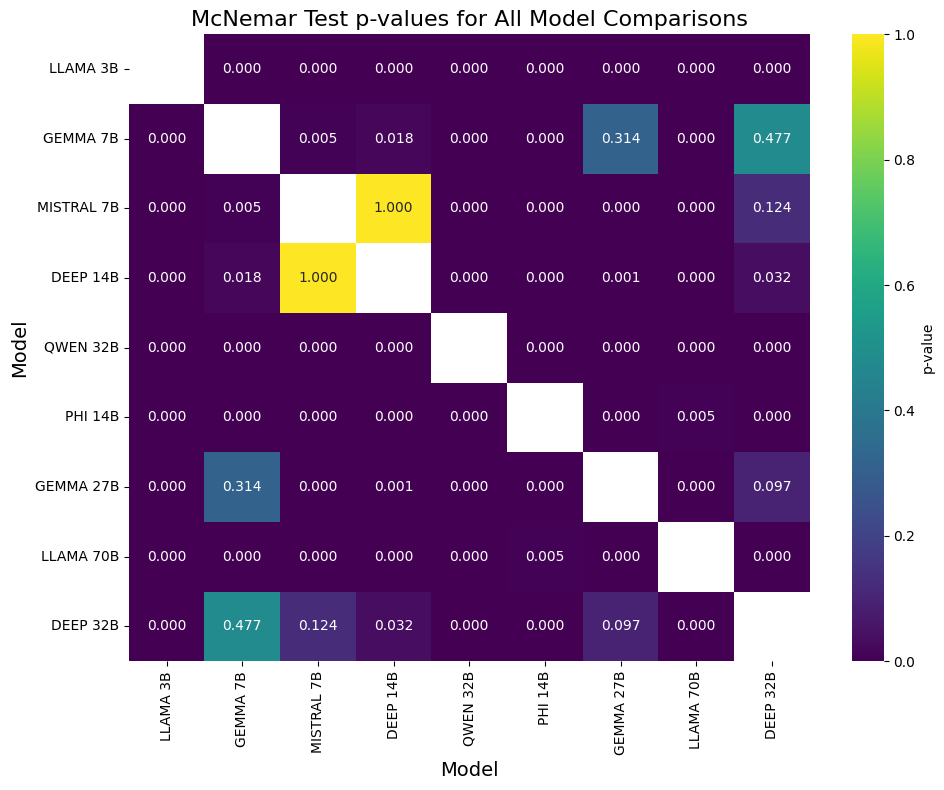

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.contingency_tables import mcnemar

# Create a dictionary with model names and their corresponding correctness (1 if prediction matches human response, 0 otherwise)
models = {
    "LLAMA 3B": (df['LLM Response_Llama 3b'] == df['Human Response']).astype(int),
    "GEMMA 7B": (df['LLM Response_Gemma 7b'] == df['Human Response']).astype(int),
    "MISTRAL 7B": (df['LLM Response_Mistral 7b'] == df['Human Response']).astype(int),
    "DEEP 14B": (df['LLM Response_Deep 14b'] == df['Human Response']).astype(int),
    "QWEN 32B": (df['LLM Response_Qwen 32b'] == df['Human Response']).astype(int),
    "PHI 14B": (df['LLM Response_Phi 14b'] == df['Human Response']).astype(int),
    "GEMMA 27B": (df['LLM Response_Gemma 27b'] == df['Human Response']).astype(int),
    "LLAMA 70B": (df['LLM Response_Llama 70b'] == df['Human Response']).astype(int),
    "DEEP 32B": (df['LLM Response_Deep 32b'] == df['Human Response']).astype(int)
}

model_names = list(models.keys())
n_models = len(model_names)

# Create empty DataFrames to store p-values and test statistics
p_values = pd.DataFrame(np.nan, index=model_names, columns=model_names)
test_stats = pd.DataFrame(np.nan, index=model_names, columns=model_names)

# Loop over all pairs of models and run McNemar's test
for i in range(n_models):
    for j in range(n_models):
        if i == j:
            continue  # Skip comparing the model with itself
        model_i = models[model_names[i]]
        model_j = models[model_names[j]]
        # Count cases where model_i is wrong and model_j is right, and vice versa
        b = np.sum((model_i == 0) & (model_j == 1))
        c = np.sum((model_i == 1) & (model_j == 0))

        # Build the 2x2 contingency table
        table = [[0, b],
                 [c, 0]]

        # Run McNemar's test (exact test is used for small samples)
        result = mcnemar(table, exact=True)
        p_values.iloc[i, j] = result.pvalue
        test_stats.iloc[i, j] = result.statistic

        # Print detailed results for this pair
        print(f"=== McNemar’s Test: {model_names[i]} vs {model_names[j]} ===")
        print(f"b (model_i wrong, model_j right): {b}")
        print(f"c (model_i right, model_j wrong): {c}")
        print(f"Statistic: {result.statistic}, p-value: {result.pvalue}")
        if result.pvalue < 0.05:
            print("=> Significant difference at the 5% level.")
        else:
            print("=> NOT a significant difference at the 5% level.")
        print("\n")

# Display the matrix of p-values
print("P-values Matrix:")
print(p_values)

# Create a heatmap to visualize the p-values matrix
plt.figure(figsize=(10, 8))
sns.heatmap(p_values.astype(float), annot=True, fmt=".3f", cmap="viridis",
            cbar_kws={"label": "p-value"})
plt.title("McNemar Test p-values for All Model Comparisons", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.tight_layout()
plt.show()
